
# Common Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import plotly.graph_objects as go
import nibabel as nb
from glob import glob
from copy import copy

# Custom Libraries

In [2]:
import sys
sys.path.append("/home/seojin/Seojin_commonTool/Module")
sys.path.append("/home/seojin/Seojin_commonTool/Module/Brain_Surface/")

from plot_3d import draw_uv_map, show_non_interactive_mesh, show_mesh
from brain_mesh import show_stat_onUV, load_mesh, show_interactive_mesh, show_components, component_mesh_info
from sj_matplotlib import get_color, make_line_legend
from surface_analysis import surface_profile_onUV, draw_cross_section_1dPlot
from brain_mesh import inverse_component_mesh_info

# Constants

In [3]:
mask_dir_path = "/mnt/ext1/seojin/HR/exp_blueprint_0324v4/fMRI_data/output/roi/mask/hippocampus"

lt_hippo_path = os.path.join(mask_dir_path, "lt_hippocampus.obj")
rt_hippo_path = os.path.join(mask_dir_path, "rt_hippocampus.obj")

save_dir_path = "/mnt/ext1/seojin/temp"

# Load Data

In [4]:
# Vertex & Faces
lt_hippo_mesh_info = load_mesh(lt_hippo_path)
rt_hippo_mesh_info = load_mesh(rt_hippo_path)

In [13]:
def combine_mesh_info(mesh_info1, 
                      mesh_info2):
    vertices = np.r_[mesh_info1["vertex"], mesh_info2["vertex"]]
    faces = np.r_[mesh_info1["face"], mesh_info2["face"] + len(mesh_info1["vertex"])]

    mesh_info = {
        "vertex" : vertices,
        "face" : faces,
    }
    return mesh_info

In [16]:
combined_mesh_info = combine_mesh_info(lt_hippo_mesh_info, 
                                       rt_hippo_mesh_info)

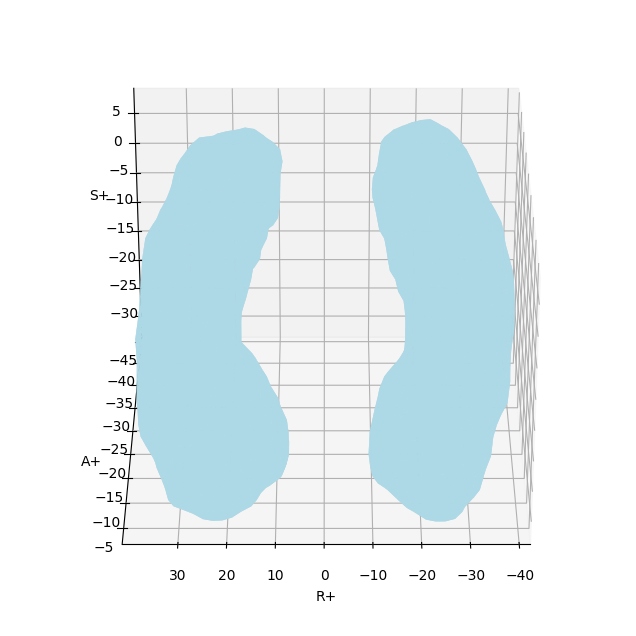

In [17]:
fig, ax = show_mesh(vertices = combined_mesh_info["vertex"],
                    faces = combined_mesh_info["face"],
                    edgeColor = None)

# Interactive virtual strip

In [22]:
lt_is_highlight_face = np.alltrue(np.isin(lt_hippo_uv_mesh_info["face"], lt_highlight_vertex_indices), axis = 1)
lt_highlight_face_indices = np.where(lt_is_highlight_face)[0]
show_interactive_mesh(vertices = lt_hippo_uv_mesh_info["vertex"],
                      faces = lt_hippo_uv_mesh_info["face"],
                      highlight_face_info = {
                          "name" : {
                              "color" : highlight_color,
                              "data" : lt_highlight_face_indices,
                          }
                      })

In [23]:
rt_is_highlight_face = np.alltrue(np.isin(rt_hippo_uv_mesh_info["face"], rt_highlight_vertex_indices), axis = 1)
rt_highlight_face_indices = np.where(rt_is_highlight_face)[0]
show_interactive_mesh(vertices = rt_hippo_uv_mesh_info["vertex"],
                      faces = rt_hippo_uv_mesh_info["face"],
                      highlight_face_info = {
                          "name" : {
                              "color" : highlight_color,
                              "data" : rt_highlight_face_indices,
                          }
                      })

In [24]:
show_interactive_mesh(vertices = np.r_[lt_hippo_uv_mesh_info["vertex"], rt_hippo_uv_mesh_info["vertex"]],
                      faces = np.r_[lt_hippo_uv_mesh_info["face"], rt_hippo_uv_mesh_info["face"] + len(lt_hippo_uv_mesh_info["vertex"])],
                      highlight_face_info = {
                          "name" : {
                              "color" : highlight_color,
                              "data" : np.r_[lt_is_highlight_face_indices, rt_is_highlight_face_indices + len(lt_hippo_uv_mesh_info["face"])],
                          }
                      },
                      default_color = "lightblue",
                      is_visible_axis = True)

NameError: name 'lt_is_highlight_face_indices' is not defined